In [8]:
import matplotlib.pyplot as plt

import sys

sys.path.append('../utils')
from utils.search import *
from utils.data_generator import *
from utils.kernels import *

import seaborn as sns
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd

from  utils.svm_libsvm import *

from utils.svm_cvx import *
import pandas as pd 
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')


# Linear Separable data

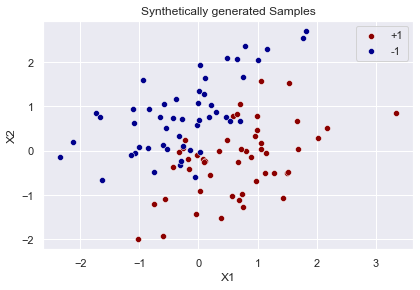

In [9]:
x1,y1,x2,y2 = generate_linearly_separable_data(cov=[[0.8,0.45],[0.45,0.8]],count=50)
plt.figure()
sns.scatterplot(x=x1[:,0],y=x1[:,1],label='+1',color='darkred')
sns.scatterplot(x=x2[:,0],y=x2[:,1],label='-1',color='darkblue')
plt.xlabel('X1'),plt.ylabel('X2'),plt.tight_layout(),plt.title('Synthetically generated Samples')
plt.show()

In [11]:
X_train =np.vstack((x1,x2))
Y_train = np.hstack((y1,y2))

In [39]:
params = [  {'kernel':['linear'],'C':[1e-4,1e-3,1e-2,5e-2,1e-1,1e0]},
            {'kernel': ['gaussian'], 'C':[1e-3,1e-2,1e-1, 1e0, 1e1, 1e2, 1e3],'gamma':[1e-3,1e-2,1e-1,1e0,1e1,1e2]},
            {'kernel': ['polynomial'], 'C':[1e-2,1e-1, 1e0, 1e1, 1e2],'degree':[2,3,4]},
]
gsvm  = gridSearchCV_SVM(paramGrid=params,X=X_train,Y=Y_train,cv=5,estimator_type=1)
gsvm.run()
gsvm.best_param()


{'C': 0.001,
 'kernel': 'linear',
 'test_score': 0.89,
 'train_score': 0.8574999999999999}

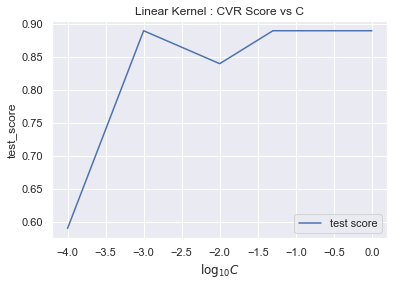

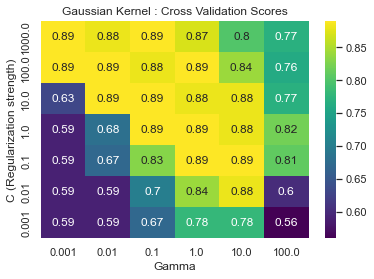

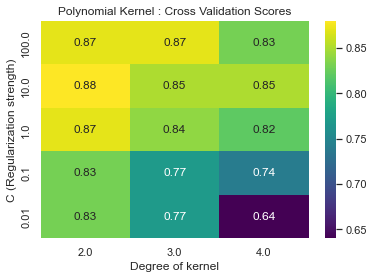

In [40]:
gsvm.plot_graph()


In [166]:
# using SKLEARN library
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV


In [207]:
# defining parameter range
params = [{'kernel': ['linear'], 'C':[1e-2, 5e-2, 1e-1, 1e0, 1e1, 1e2]},
          {'kernel': ['rbf'], 'C':[1e-1, 1e0, 1e1, 1e2, 1e3],
           'gamma':[1e-2, 1e-1, 1e0, 1e1, 1e2]},
          {'kernel': ['poly'], 'C':[
              1e-2, 1e-1, 1e0, 1e1, 1e2], 'degree':[2, 3, 4]},
          ]

grid = GridSearchCV(SVC(), params)

# fitting the model for grid search
grid.fit(X_train, Y_train)


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.01, 0.05, 0.1, 1.0, 10.0, 100.0],
                          'kernel': ['linear']},
                         {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                          'gamma': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'degree': [2, 3, 4], 'kernel': ['poly']}])

In [208]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.0019,0.0003,0.0009,0.0002,10.0000,poly,NaN,3,"{'C': 10.0, 'degree': 3, 'kernel': 'poly'}",0.8000,0.8500,0.9500,0.8000,0.9000,0.8600,0.0583,1
5,0.0058,0.0027,0.0013,0.0005,100.0000,linear,NaN,NaN,"{'C': 100.0, 'kernel': 'linear'}",0.8000,0.8500,0.8500,0.8500,0.9000,0.8500,0.0316,2
3,0.0026,0.0026,0.0018,0.0010,1.0000,linear,NaN,NaN,"{'C': 1.0, 'kernel': 'linear'}",0.8000,0.8000,0.8500,0.8500,0.9000,0.8400,0.0374,3
4,0.0020,0.0005,0.0011,0.0003,10.0000,linear,NaN,NaN,"{'C': 10.0, 'kernel': 'linear'}",0.7500,0.8500,0.8500,0.8500,0.9000,0.8400,0.0490,3
7,0.0020,0.0004,0.0016,0.0006,0.1000,rbf,0.1000,NaN,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.8000,0.8500,0.8500,0.8500,0.8500,0.8400,0.0200,3


In [46]:
def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contour(ax,X_train:np.ndarray,Y_train:np.ndarray,model,h=0.5):
    if(X_train.shape[1]!=2):
        raise ValueError('Only 2d data can be plot')
    pos_indices,neg_indices =np.where(Y_train==1)[0], np.where(Y_train==-1)[0]
    X1=  X_train[pos_indices]
    X2 = X_train[neg_indices]

    # Plot contours
    xx,yy = make_meshgrid(X_train[:,0],X_train[:,1],h=h)
    X = np.array([[x1,x2] for x1,x2 in zip(xx.ravel(),yy.ravel())])
    Z= model.pred(X).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Scatter Plot
    sns.scatterplot(x=X1[:, 0], y=X1[:, 1], label='+1',color='darkred',ax=ax)
    sns.scatterplot(x=X2[:, 0], y=X2[:, 1], label='-1',color='darkblue',ax=ax)




# Visualizing linear SVM surface boundry

In [255]:
model = SVM_CVX('linear',C=1e-1)
model.fit(X_train,Y_train)


(Text(0, 0.5, 'X2'), Text(0.5, 0, 'X1'))

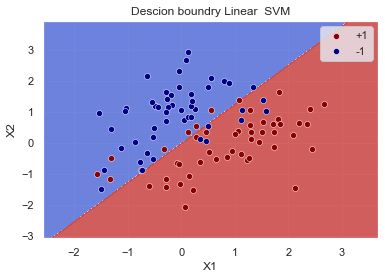

In [260]:
fig,ax =plt.subplots()
plot_contour(ax,X_train,Y_train ,model,h=0.01)
ax.set_title('Descion boundry Linear  SVM')
ax.set_ylabel('X2'),ax.set_xlabel('X1')

# Visualizing Polynomial SVM surface boundry

In [218]:
model = SVM_CVX('polynomial',C=1e0,degree=2)
model.fit(X_train,Y_train)


(Text(0, 0.5, 'X2'), Text(0.5, 0, 'X1'))

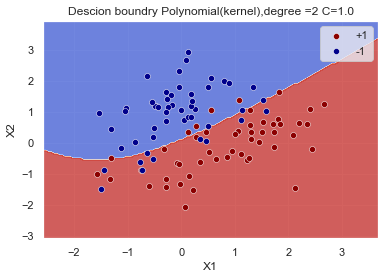

In [221]:
fig,ax =plt.subplots()
plot_contour(ax,X_train,Y_train ,model,h=0.05)
ax.set_title(f'Descion boundry Polynomial(kernel),degree ={model.degree} C={model.C}')
ax.set_ylabel('X2'),ax.set_xlabel('X1')

# Visualizing gaussian (rbf) SVM surface boundry

In [231]:
model = SVM_CVX('gaussian',C=1e0,gamma=1e-1)
model.fit(X_train,Y_train)


(Text(0, 0.5, 'X2'), Text(0.5, 0, 'X1'))

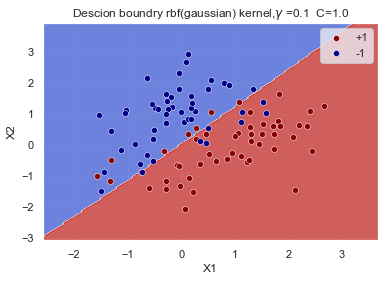

In [233]:
fig,ax =plt.subplots()
plot_contour(ax,X_train,Y_train ,model,h=0.05)
ax.set_title(f'Descion boundry rbf(gaussian) kernel,$\gamma$ ={model.gamma}  C={model.C}')
ax.set_ylabel('X2'),ax.set_xlabel('X1')

# Visualizing OverFitting Cases SVM

In [234]:
model = SVM_CVX('gaussian',C=1e3,gamma=100)
model.fit(X_train,Y_train)


(Text(0, 0.5, 'X2'), Text(0.5, 0, 'X1'))

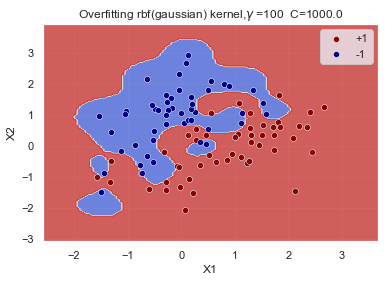

In [235]:
fig, ax = plt.subplots()
plot_contour(ax, X_train, Y_train, model, h=0.05)
ax.set_title(
    f'Overfitting rbf(gaussian) kernel,$\gamma$ ={model.gamma}  C={model.C}')
ax.set_ylabel('X2'), ax.set_xlabel('X1')


# Overfitting poly(kernel)

In [278]:
model = SVM_CVX('polynomial',C=1e2,degree=4)
model.fit(X_train,Y_train)


(Text(0, 0.5, 'X2'), Text(0.5, 0, 'X1'))

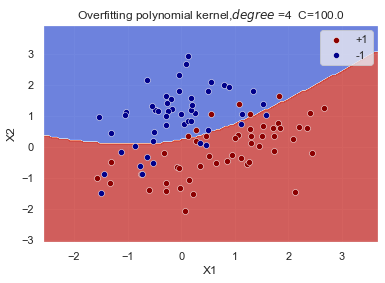

In [279]:
fig, ax = plt.subplots()
plot_contour(ax, X_train, Y_train, model, h=0.05)
ax.set_title(
    f'Overfitting polynomial kernel,$degree$ ={model.degree}  C={model.C}')
ax.set_ylabel('X2'), ax.set_xlabel('X1')


In [35]:
model =SVM_LIBSVM(C=10,kernel='gaussian',gamma=1e1)
model.fit(X_train,Y_train)


In [36]:
model.p_acc

0.81

In [41]:
params = [  {'kernel':['linear'],'C':[1e-4,1e-3,1e-2,5e-2,1e-1,1e0]},
            {'kernel': ['gaussian'], 'C':[1e-1, 1e0, 1e1, 1e2, 1e3,1e4,1e5],'gamma':[1e-2,1e-1,1e0,1e1,1e2]},
            {'kernel': ['polynomial'], 'C':[1e-2,1e-1, 1e0, 1e1, 1e2],'degree':[2,3,4]},
]
gsvm  = gridSearchCV_SVM(paramGrid=params,X=X_train,Y=Y_train,cv=5,estimator_type=0)
gsvm.run()
gsvm.best_param()


{'C': 10.0,
 'gamma': 1.0,
 'kernel': 'gaussian',
 'test_score': 0.9,
 'train_score': 0.8474999999999999}

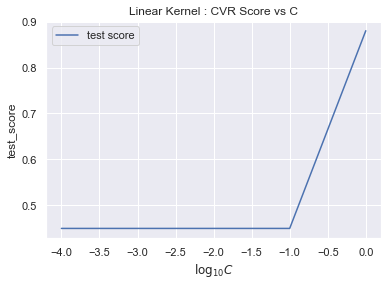

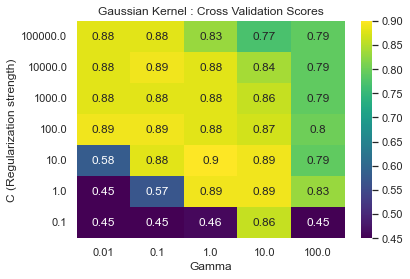

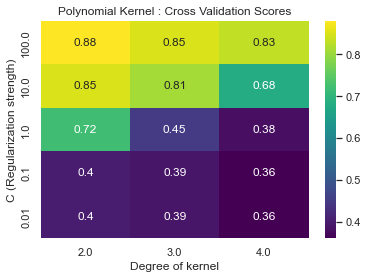

In [42]:
gsvm.plot_graph()

(Text(0, 0.5, 'X2'), Text(0.5, 0, 'X1'))

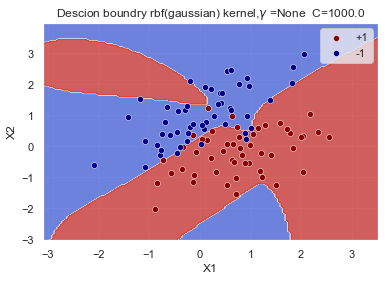

In [58]:
model = SVM_LIBSVM(degree=20,C=1000,kernel='polynomial')
model.fit(X_train,Y_train)
fig, ax = plt.subplots()
plot_contour(ax, X_train, Y_train, model, h=0.05)
ax.set_title(
    f'Descion boundry rbf(gaussian) kernel,$\gamma$ ={model.gamma}  C={model.C}')
ax.set_ylabel('X2'), ax.set_xlabel('X1')
# model.pred(X_train)

In [57]:
model.p_acc

0.86